# FIR Filter Parameters

In [1]:
import numpy as np 
from numpy.fft import fft,ifft,fftshift
import matplotlib.pyplot as plt


In [2]:
# Anfangs werte noch variabel machen 
delays = [3,5,2]
ampl = [0.2,0.5,0.8]

In [3]:
#if len(delays)!= len(ampl):
# Exeption ? 

In [4]:
[1]+[0 for n in range (0,delays[0])]+[ampl[0]]

[1, 0, 0, 0, 0.2]

In [5]:
i = len(ampl)
x = [([1]+[0 for n in range (0,delays[i])]+[ampl[i]]) for i in range(0,i)]

# Dealy Window


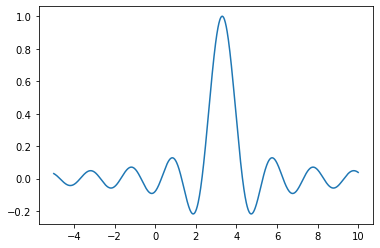

In [6]:
d = 3.3
k = np.linspace(-5,10,1000)
h_ideal = np.sinc(k-d)
plt.plot(k,h_ideal)
plt.show()



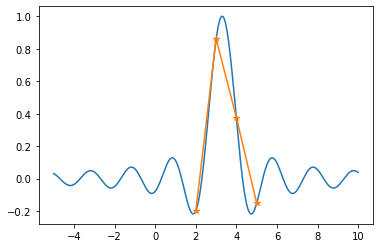

In [7]:
n = 4.5
window_sample= np.arange(np.round(d-(n-1)/2),np.round(d+(n+1)/2))
window = []
for ws in window_sample:  
    idx = (np.abs(k-ws)).argmin()
    window.append(idx)
    
plt.plot(k,h_ideal)
plt.plot(window_sample,h_ideal[window],"-*")
plt.show()

# FIR

In [8]:
delay = 3
amplitude = 1

d_int = int(np.floor(delay))
d_frac = delay - d_int

h_int = np.concatenate([np.zeros(d_int-1), [amplitude], np.zeros(3)])

In [9]:
H_int = fft(h_int)
h = ifft(H_int)

<StemContainer object of 3 artists>

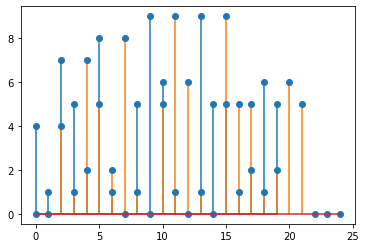

In [10]:
test = np.random.randint(0, 10, size = 20)
y = np.convolve(test.real, h_int)

plt.stem(test, linefmt="C0-")
plt.stem(y, linefmt='C1-')

In [11]:
test

array([4, 1, 7, 5, 2, 8, 1, 0, 5, 9, 6, 1, 0, 9, 5, 5, 1, 2, 6, 5])

In [12]:
h_int

array([0., 0., 1., 0., 0., 0.])

In [13]:
y

array([0., 0., 4., 1., 7., 5., 2., 8., 1., 0., 5., 9., 6., 1., 0., 9., 5.,
       5., 1., 2., 6., 5., 0., 0., 0.])

# FIR mit Delay 


System frequencies fs=10, T=0.1
Tap with amplitude=4, delay=0.7230000000000001
Creating filter of order N=15.0


<StemContainer object of 3 artists>

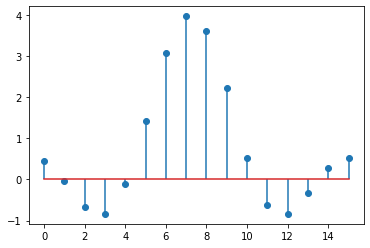

In [107]:
samp_rate = 10
period = 1 / samp_rate
print(f"System frequencies fs={samp_rate}, T={period}")

delay = 7.23 * period
ampl = 4
print(f"Tap with amplitude={ampl}, delay={delay}")

order = 2 * np.floor(delay / period) + 1
print(f"Creating filter of order N={order}")

skip = np.floor(delay / period) - (order - 1) / 2
assert skip >= 0

samples = np.arange(0, order + 1) * period - delay
h = ampl*(np.sin(samp_rate * samples) / (samp_rate * samples))

plt.stem(h)

<StemContainer object of 3 artists>

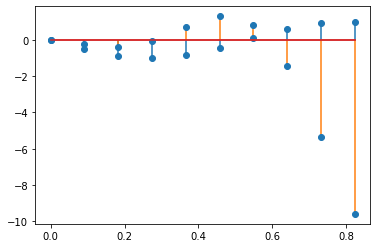

In [110]:
t = np.linspace(0, delay + period, samp_rate)
f = np.sin(2 * np.pi * samp_rate * t)

f_shift = np.convolve(h, f)[:len(f)]

plt.stem(t, f, linefmt="C0-")
plt.stem(t, f_shift, linefmt='C1-')